In [1]:
%%time 
import xarray as xr
kfile = '/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/complete/CMIP6_rel1_6233/ScenarioMIP_CNRM-CERFACS_CNRM-ESM2-1_ssp119_r1i1p1f2_3hr_huss_gr_v20190328_kr1.0.json'
ds = xr.open_dataset(kfile, engine='kerchunk')

CPU times: user 3.12 s, sys: 1.5 s, total: 4.63 s
Wall time: 7.23 s


In [2]:
%%time
h1 = ds['huss'].sel(lat=slice(-60,0), lon=slice(80,180))

CPU times: user 1.16 s, sys: 88.8 ms, total: 1.25 s
Wall time: 1.28 s


In [3]:
h2 = h1.isel(time=slice(0,10))

In [4]:
h2

<xarray.DataArray 'huss' (time: 10, lat: 43, lon: 72)> Size: 124kB
dask.array<getitem, shape=(10, 43, 72), dtype=float32, chunksize=(1, 43, 72), chunktype=numpy.ndarray>
Coordinates:
    height   float64 8B ...
  * lat      (lat) float64 344B -59.53 -58.13 -56.73 ... -3.502 -2.101 -0.7004
  * lon      (lon) float64 576B 80.16 81.56 82.97 84.38 ... 177.2 178.6 180.0
  * time     (time) datetime64[ns] 80B 2015-01-01T03:00:00 ... 2015-01-02T06:...
Attributes:
    cell_measures:       area: areacella
    cell_methods:        area: mean time: point
    description:         This is sampled synoptically.
    history:             none
    interval_operation:  900 s
    interval_write:      3 h
    long_name:           Near-Surface Specific Humidity
    online_operation:    instant
    standard_name:       specific_humidity
    units:               1

In [5]:
h3 = h2.mean(dim='time')

In [6]:
h2

<xarray.DataArray 'huss' (time: 10, lat: 43, lon: 72)> Size: 124kB
dask.array<getitem, shape=(10, 43, 72), dtype=float32, chunksize=(1, 43, 72), chunktype=numpy.ndarray>
Coordinates:
    height   float64 8B ...
  * lat      (lat) float64 344B -59.53 -58.13 -56.73 ... -3.502 -2.101 -0.7004
  * lon      (lon) float64 576B 80.16 81.56 82.97 84.38 ... 177.2 178.6 180.0
  * time     (time) datetime64[ns] 80B 2015-01-01T03:00:00 ... 2015-01-02T06:...
Attributes:
    cell_measures:       area: areacella
    cell_methods:        area: mean time: point
    description:         This is sampled synoptically.
    history:             none
    interval_operation:  900 s
    interval_write:      3 h
    long_name:           Near-Surface Specific Humidity
    online_operation:    instant
    standard_name:       specific_humidity
    units:               1

In [1]:
%%time
import fsspec
import xarray as xr

kfile = '/gws/nopw/j04/cmip6_prep_vol1/kerchunk-pipeline/complete/CMIP6_rel1_6233/ScenarioMIP_CNRM-CERFACS_CNRM-ESM2-1_ssp119_r1i1p1f2_3hr_huss_gr_v20190328_kr1.0.json'
mapper = fsspec.get_mapper('reference://',fo=kfile)
ds = xr.open_zarr(mapper, consolidated=False)

CPU times: user 3.5 s, sys: 1.42 s, total: 4.92 s
Wall time: 5.63 s


In [2]:
%%time
h1 = ds['huss'].sel(lat=slice(-60,0), lon=slice(80,180)).isel(time=slice(10000,12000)).mean(dim='time')

NameError: name 'ds' is not defined

In [ ]:
h1

In [3]:
%%time
h2 = h1.compute()

CPU times: user 752 μs, sys: 0 ns, total: 752 μs
Wall time: 776 μs


CPU times: user 458 ms, sys: 57.7 ms, total: 516 ms
Wall time: 984 ms


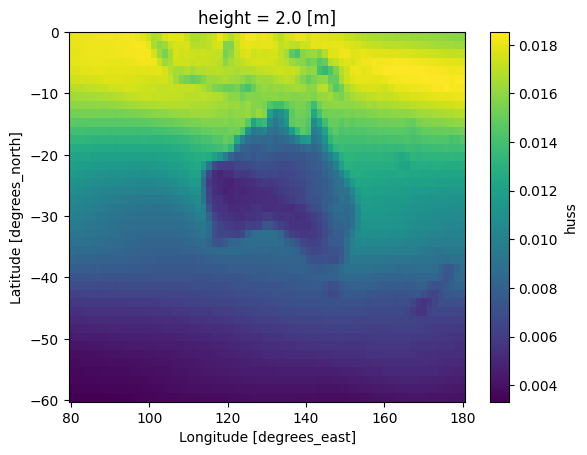

In [4]:
%%time
h2.plot()

In [ ]:
ds['huss'].sel(lat=slice(-60,0), lon=slice(80,180)).isel(time=slice(10000,12000))